<div>
Olá, Bruno!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. Essa versão do seu trabalho ficou muito boa! Espero que as sugestões sejam relevantes para projetos futuros. Como sugestão geral, considere organizar o seu notebook de forma a refletir a descrição do projeto. 
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import math as mth

In [2]:
df_data1 = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')

In [3]:
df_data1.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [4]:
df_data1.columns = df_data1.columns.str.lower()

In [5]:
df_data1.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente usando o separador `;`
- O import das bibliotecas foi feito de forma correta e em uma célula separada
- O método `head()` foi usado para estudo inicial dos dados
- Como sugestão, considere executar as operações acima em células separadas. Além disso, você pode usar o método `describe()` aqui também para exibir as estatísticas descritivas do conjunto de dados

</div>

In [6]:
df_data1['ice'] = (df_data1['impact'] * df_data1['confidence']) / df_data1['effort']

# Ordenando em ordem decrescente de prioridade
df_ice_sorted = df_data1.sort_values(by='ice', ascending=False)

# Visualiza o resultado
(df_ice_sorted[['hypothesis', 'ice']])

,hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [7]:
# Calculando a pontuação RICE
df_data1['rice'] = (df_data1['reach'] * df_data1['impact'] * df_data1['confidence']) / df_data1['effort']

# Ordenando por RICE
df_rice_sorted = df_data1.sort_values(by='rice', ascending=False)

# Exibindo a comparação ICE vs RICE
df_comparison = df_data1[['hypothesis', 'ice', 'rice']].sort_values(by='rice', ascending=False)
(df_comparison)

,hypothesis,ice,rice
7,Add a subscription form to all the main pages....,11.200000,112.0
2,Add product recommendation blocks to the store...,7.000000,56.0
0,Add two new channels for attracting traffic. T...,13.333333,40.0
6,Show banners with current offers and sales on ...,8.000000,40.0
8,Launch a promotion that gives users discounts ...,16.200000,16.2
3,Change the category structure. This will incre...,1.125000,9.0
1,Launch your own delivery service. This will sh...,2.000000,4.0
5,Add a customer review page. This will increase...,1.333333,4.0
4,Change the background color on the main page. ...,1.000000,3.0


 Hipóteses que subiram com RICE:

    "Add a subscription form"

       ICE: 11.2 → já era boa.

        RICE: 112.0 → subiu ainda mais porque tem reach = 10, ou seja, impacto em muita gente.

        Ganhou prioridade com RICE.

    "Add product recommendations"

        ICE: 7.0 → boa ideia.

        RICE: 56.0 → subiu também

        Confirmou sua importância com RICE.

Hipóteses que caíram com RICE:

    "Launch birthday promotion"

        ICE: 16.2 → muito alta.

        RICE: 16.2 → mesma pontuação, pois reach = 1.

        Caiu na lista porque impacta pouca gente.

    "Launch delivery service"

        ICE: 2.0 → já era fraca.

        RICE: 4.0 → permanece baixa, devido a reach = 2 e alto esforço (10).

        Reforça a baixa prioridade.

    "Change background color"

        ICE: 1.0

        RICE: 3.0

        Continua em último lugar, com baixo impacto e alcance.

Conclusão:

    O ICE foca na qualidade da ideia e esforço.

    O RICE destaca as ideias com maior potencial de escala.

    Usar  o RICE ajuda a priorizar hipóteses que impactam mais usuários, mesmo que não sejam as mais brilhantes individualmente.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os indicadores `ICE` e `RICE` foram calculados corretamente para estimar o impacto de hipóteses. 
- As hipóteses foram ordenadas corretamente pelos scores criados!
</div>

In [8]:
df_orders = pd.read_csv('/datasets/orders_us.csv',sep=',')

In [9]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
print(df_orders['date'].dtype)

object


In [11]:
df_orders['date'] = pd.to_datetime(df_orders['date'], format='%Y-%m-%d')

In [12]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [13]:
df_visits= pd.read_csv('/datasets/visits_us.csv',sep=',')

In [14]:
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
print(df_visits['date'].dtype)

object


In [16]:
df_visits['date'] = pd.to_datetime(df_visits['date'], format='%Y-%m-%d')

In [17]:
df_revenue_by_group = df_orders.groupby(["date", 'group'])['revenue'].sum().unstack()

In [18]:
df_revenue_by_group.head()

group,A,B
date,,
2019-08-01,2356.8,1620.0
2019-08-02,1503.5,2623.8
2019-08-03,1815.2,1806.8
2019-08-04,1146.6,1717.3
2019-08-05,1988.1,1495.0


In [19]:
df_revenue_by_group = df_revenue_by_group.fillna(0).cumsum()

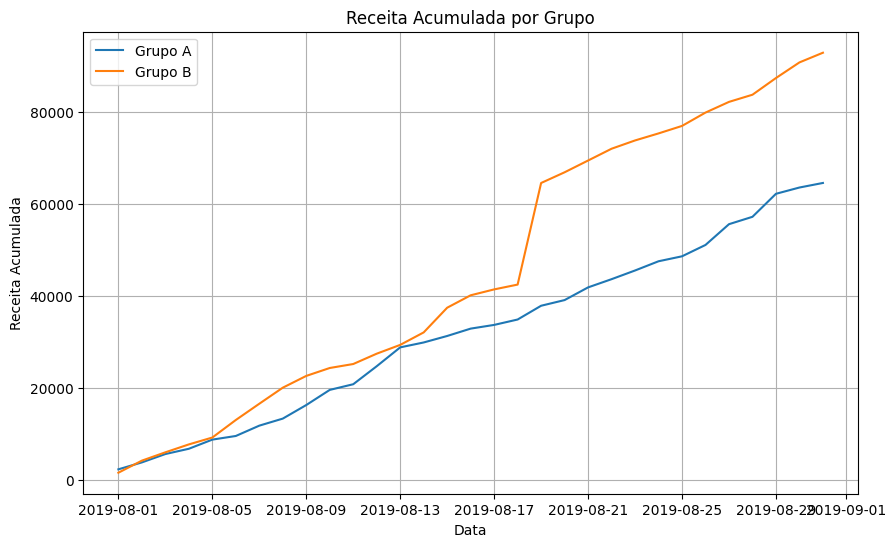

In [20]:
plt.figure(figsize=(10,6))
plt.plot(df_revenue_by_group.index, df_revenue_by_group['A'], label='Grupo A')
plt.plot(df_revenue_by_group.index, df_revenue_by_group['B'], label='Grupo B')
plt.title('Receita Acumulada por Grupo')
plt.xlabel('Data')
plt.ylabel('Receita Acumulada')
plt.legend()
plt.grid()
plt.show()

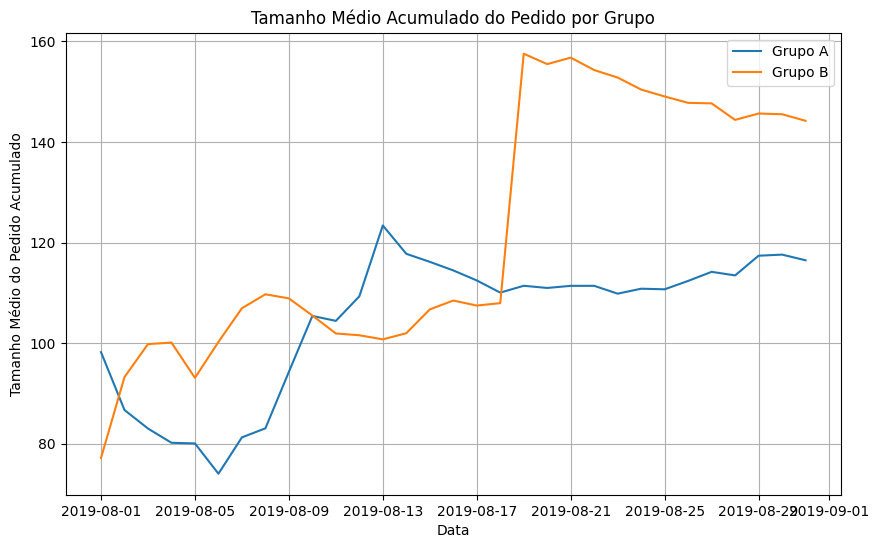

In [21]:
# Tamanho médio do pedido diário
df_orders_mean = df_orders.groupby(['date', 'group'])['revenue'].mean().unstack()
# Acumulado (média acumulada)
df_orders_mean = df_orders_mean.expanding().mean()

plt.figure(figsize=(10,6))
plt.plot(df_orders_mean.index, df_orders_mean['A'], label='Grupo A')
plt.plot(df_orders_mean.index, df_orders_mean['B'], label='Grupo B')
plt.title('Tamanho Médio Acumulado do Pedido por Grupo')
plt.xlabel('Data')
plt.ylabel('Tamanho Médio do Pedido Acumulado')
plt.legend()
plt.grid()
plt.show()

In [26]:
df_orders_mean.head()

group,A,B
date,,
2019-08-01,98.200000,77.142857
2019-08-02,86.687500,93.233929
2019-08-03,83.002778,99.797619
2019-08-04,80.167708,100.102626
2019-08-05,80.038967,93.082101


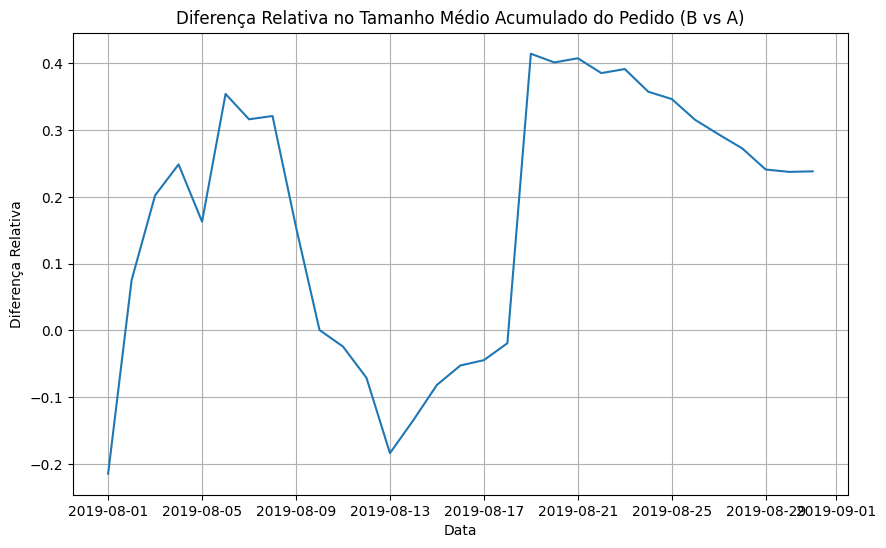

In [22]:
diff_df_orders_mean = (df_orders_mean['B'] / df_orders_mean['A']) - 1

plt.figure(figsize=(10,6))
plt.plot(diff_df_orders_mean.index, diff_df_orders_mean)
plt.title('Diferença Relativa no Tamanho Médio Acumulado do Pedido (B vs A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa')
plt.grid()
plt.show()

Se a linha está acima de 0, significa que grupo B teve pedidos médios maiores que A naquele ponto.

Se está abaixo de 0, o oposto: B teve desempenho inferior

In [27]:
diff_df_orders_mean.head()

date
2019-08-01   -0.214431
2019-08-02    0.075518
2019-08-03    0.202341
2019-08-04    0.248665
2019-08-05    0.162960
dtype: float64

In [24]:
# Quando a  diferença for positiva e significativa, grupo B está gerando pedidos maiores.

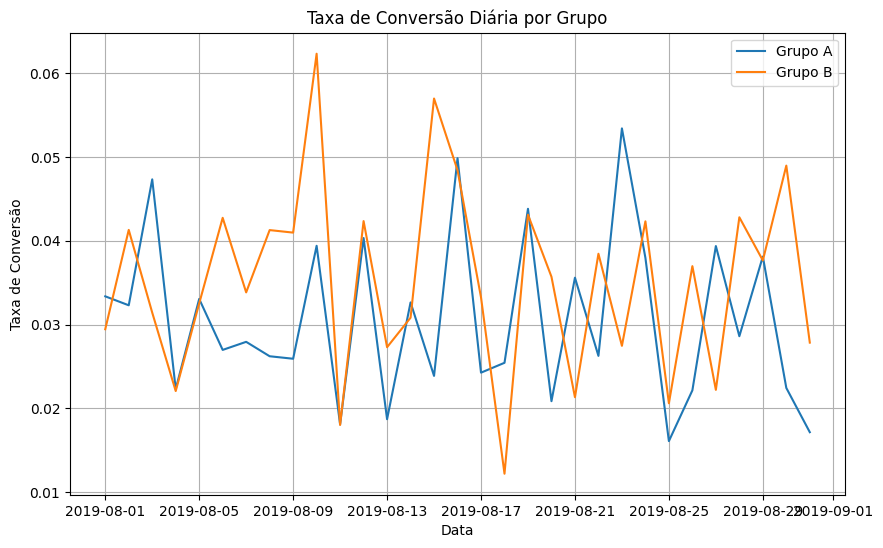

In [30]:
# Número de pedidos por dia e grupo
df_orders_daily = df_orders.groupby(['date', 'group'])['transactionId'].nunique().unstack()

# Juntando visitas e pedidos
df_conversion = df_orders_daily / df_visits.pivot(index='date', columns='group', values='visits')

plt.figure(figsize=(10,6))
plt.plot(df_conversion.index, df_conversion['A'], label='Grupo A')
plt.plot(df_conversion.index, df_conversion['B'], label='Grupo B')
plt.title('Taxa de Conversão Diária por Grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.legend()
plt.grid()
plt.show()

In [ ]:
Quando B estiver consistentemente acima de A → sinal de que pode estar performando melhor.

Se as taxas forem muito próximas ou cruzarem → pode indicar que a diferença não é tão significativa.

In [29]:
df_conversion.head()

group,A,B
date,,
2019-08-01,0.033380,0.029453
2019-08-02,0.032310,0.041308
2019-08-03,0.047337,0.031434
2019-08-04,0.022315,0.022078
2019-08-05,0.033069,0.032532


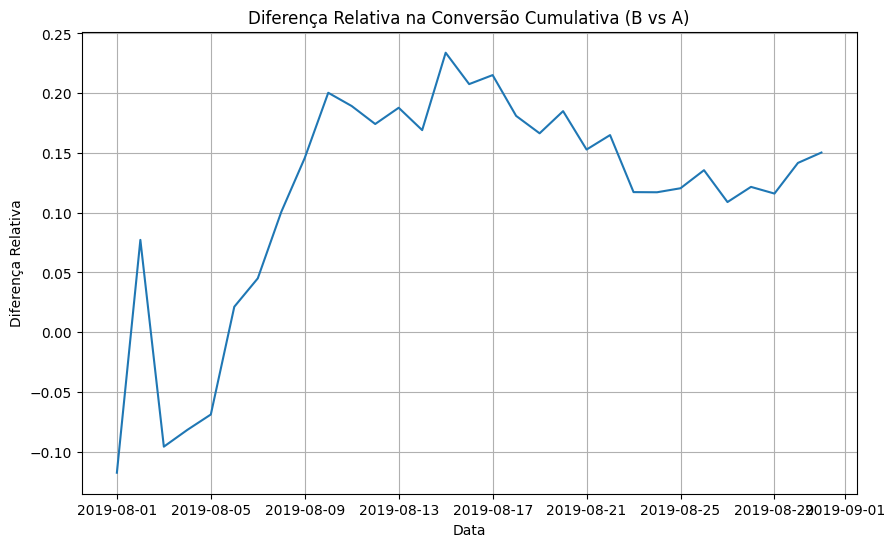

In [32]:
df_conversion_cum = df_conversion.cumsum()
df_diff_conversion_cum = (df_conversion_cum['B'] / df_conversion_cum['A']) - 1

plt.figure(figsize=(10,6))
plt.plot(df_diff_conversion_cum.index, df_diff_conversion_cum)
plt.title('Diferença Relativa na Conversão Cumulativa (B vs A)')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa')
plt.grid()
plt.show()

Linha acima de zero:
Grupo B tem taxa de conversão acumulada maior que A. Isso indica que a experiência do grupo B está trazendo mais conversões ao longo do tempo.

Linha abaixo de zero:
Grupo B está performando pior que o grupo A.

No gráfico, após o dia 05/08, a linha esteve consistentemente acima de zero e crescente até o dia 15/08 mais ou menos, levando a concluir que a variação implementada no grupo B está melhorando a conversão. E após isso, se manteve constante.

A interface testada no grupo B facilitou o processo de compra, levando a mais visitantes convertendo com o tempo.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- [x] A receita cumulativa por grupo foi analisada
- [x] A diferença relativa do tamanho médio do pedido foi calculada
- [x] A conversão por grupo foi analisada
- [x] A conclusão foi apresentada

</div>

In [34]:
df_orders_per_user = df_orders.groupby('visitorId')['transactionId'].count()
p95 = np.percentile(df_orders_per_user, 95)
p99 = np.percentile(df_orders_per_user, 99)

print(f'Percentil 95: {p95}')
print(f'Percentil 99: {p99}')

Percentil 95: 2.0
Percentil 99: 4.0


    Se um usuário fez mais de 2 pedidos (acima do percentil 95), ele está entre os 5% que mais compraram — pode ser um outlier moderado.

    Se um usuário fez mais de 4 pedidos (acima do percentil 99), ele está entre o 1% topo — é um outlier forte, uma anomalia.

Portanto:

    Definição simples de anomalia (moderada): número de pedidos > 2

    Definição forte de anomalia: número de pedidos > 4

In [39]:
df_p95_price = np.percentile(df_orders['revenue'], 95)
df_p99_price = np.percentile(df_orders['revenue'], 99)

print(f'Percentil 95 dos preços: {df_p95_price}')
print(f'Percentil 99 dos preços: {df_p99_price}')

Percentil 95 dos preços: 435.54
Percentil 99 dos preços: 900.9039999999999


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Os percentis 95 e 99 foram calculados para o número de pedidos e preços. Sugestão: faça o cálculo por grupo também.
</div>

In [35]:
from statsmodels.stats.proportion import proportions_ztest

# Contagem de conversões e visitas por grupo
orders_count = df_orders.groupby('group')['transactionId'].count()
visits_count = df_visits.groupby('group')['visits'].sum()

conversions = orders_count.values
visits = visits_count.values

stat, p_value = proportions_ztest(conversions, visits)
print(f"p-valor diferença na conversão (dados brutos): {p_value}")

p-valor diferença na conversão (dados brutos): 0.02320723394441847


In [36]:
group_a_revenue = df_orders[df_orders['group'] == 'A']['revenue']
group_b_revenue = df_orders[df_orders['group'] == 'B']['revenue']

stat, p_value = stats.mannwhitneyu(group_a_revenue, group_b_revenue, alternative='two-sided')
print(f"p-valor diferença no tamanho médio do pedido (dados brutos): {p_value}")

p-valor diferença no tamanho médio do pedido (dados brutos): 0.6915246773264736


In [45]:
df_max_orders_per_user = p99
df_max_price_order = df_p99_price

# Usuários anômalos
df_anomalous_users = df_orders_per_user[df_orders_per_user > df_max_orders_per_user].index

# Pedidos anômalos (por preço)
df_orders_filtered = df_orders[~df_orders['visitorId'].isin(df_anomalous_users)]
df_orders_filtered = df_orders_filtered[df_orders_filtered['revenue'] <= df_max_price_order]

In [47]:
df_orders_filtered.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [49]:
df_orders_count_filt = df_orders_filtered.groupby('group')['transactionId'].count()
df_visits_count_filt = df_visits.groupby('group')['visits'].sum()

df_conversions_filt = df_orders_count_filt.values
df_visits_filt = df_visits_count_filt.values

stat, p_value = proportions_ztest(df_conversions_filt, df_visits_filt)
print(f"p-valor diferença na conversão (dados filtrados): {p_value}")

p-valor diferença na conversão (dados filtrados): 0.014235438291213036


In [51]:
df_group_a_revenue_filt = df_orders_filtered[df_orders_filtered['group'] == 'A']['revenue']
df_group_b_revenue_filt = df_orders_filtered[df_orders_filtered['group'] == 'B']['revenue']

stat, p_value = stats.mannwhitneyu(df_group_a_revenue_filt, df_group_b_revenue_filt, alternative='two-sided')
print(f"p-valor diferença no tamanho médio do pedido (dados filtrados): {p_value}")

p-valor diferença no tamanho médio do pedido (dados filtrados): 0.9331836749949988


O p-valor de 0.933 (aproximadamente 93%) indica que não há evidência estatística suficiente para rejeitar a hipótese nula.

Ou seja, a diferença no tamanho médio do pedido entre os grupos (dados filtrados) provavelmente ocorreu por acaso.

    Com base no p-valor para o tamanho médio do pedido filtrado, a decisão sugerida seria:

2. Parar o teste e concluir que não há diferença estatisticamente significativa entre os grupos para essa métrica.



</div><div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os testes de hipóteses foram conduzidos corretamente
- O `p-value` foi apresentado
- As conclusões foram apresentadas!

</div>